# EDA of the small_test.csv:

In [18]:
"""ML Project-1.ipynb
Group Members:
A20584318 - ANSH KAUSHIK
A20593046 - ARUNESHWARAN SIVAKUMAR
A20588339 - HARISH NAMASIVAYAM MUTHUSWAMY
A20579993 - SHARANYA MISHRA
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import csv

data=pd.read_csv('./small_test.csv')
data.head(20)

,x_0,x_1,x_2,y
0,-2.421349,6.290215,2.516304,10.240120
1,8.134658,-6.975969,-3.281095,-6.896294
2,-0.453124,0.058895,-3.592293,14.104288
3,3.979833,-8.129002,9.202915,-43.788868
4,-4.354232,2.472475,8.459722,-12.067617
5,8.726621,-9.607723,-5.092837,-8.265643
6,-0.291365,8.224664,-3.819334,32.981856
7,1.411871,6.003043,3.996826,0.726779
8,0.215252,-3.321042,-5.352746,11.934441
9,4.802262,9.818246,4.936296,3.599572


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x_0,50.0,0.919729,5.783714,-8.642801,-3.995705,1.730267,5.397151,9.717340
x_1,50.0,0.735999,5.720213,-9.752059,-4.011655,1.180905,5.212510,9.818246
x_2,50.0,0.156729,5.559850,-9.896226,-4.267913,0.069469,4.895032,9.810419
y,50.0,3.335015,22.598316,-43.788868,-11.620343,3.025178,16.824434,50.359814


/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_78384/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')
/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_78384/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

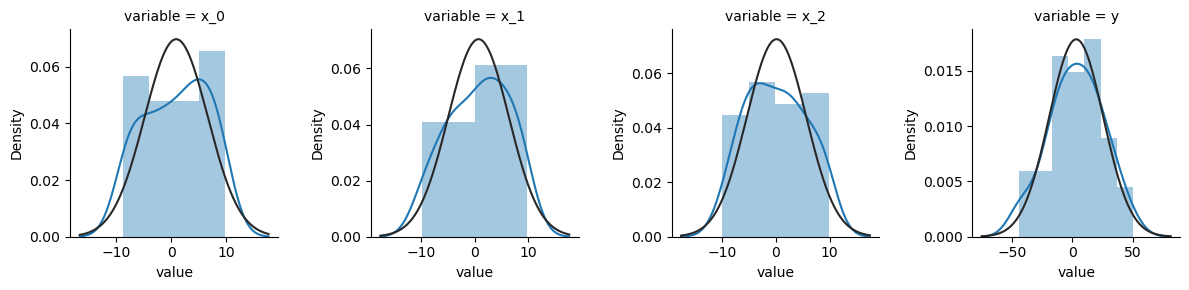

In [6]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
# Histogram to display skewness of every numeric variable
f = pd.melt(df_num, value_vars = df_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')

##### As observed, all the variables follow a normal distribution, indicating that no further transformations are necessary for this dataset..

In [8]:
# Check for missing values and print the missing columns with their counts
missing_counts = data.isnull().sum()

# Filter to get columns with missing values
missing_columns = missing_counts[missing_counts > 0]

if not missing_columns.empty:
    # Sort missing columns in descending order
    sorted_missing_columns = missing_columns.sort_values(ascending=False)

    print("Columns with missing values and their counts (sorted in descending order):")
    print(sorted_missing_columns)
else:
    print("No missing values in the DataFrame.")

No missing values in the DataFrame.


##### Hence, we conclude that the dataset has no missing values.


Strong Correlations (|correlation| > 0.7):
y - x_2: -0.78


<Axes: >

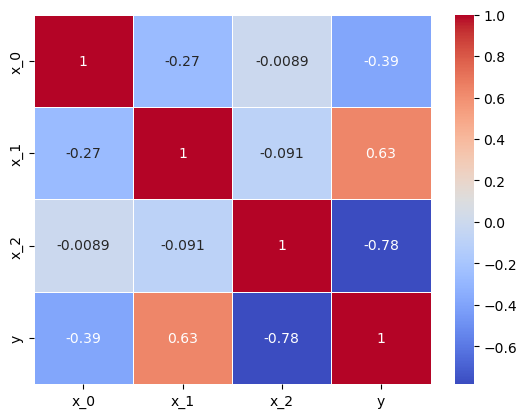

In [10]:
#checking for highly correlated columns:
correlation_matrix = data.corr()

def print_strong_correlations(corr_matrix, threshold=0.7):
    print("\nStrong Correlations (|correlation| > {}):".format(threshold))
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print("{} - {}: {:.2f}".format(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print_strong_correlations(correlation_matrix)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [12]:
import os
import sys

# Get the current notebook's absolute path and convert it to a directory path
current_notebook_path = os.path.abspath(os.getcwd())

# Append the parent directory (Project1) to the system path
project_root = os.path.dirname(current_notebook_path)
sys.path.append(project_root)

In [14]:
# Importing ElasticNetRegression and train_test_split
from Model.Gradient_Boosting import GradientBoosting
from Model.Gradient_Boosting import train_test_split
from Model.XGBoost import XGBoost as xgb
from Model.Gradient_Boosting import train_test_split

In [22]:
def test_predict():
    # Load data from CSV
    data = []
    with open("./small_test.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)

    # Extract features (X) and target variable (y) from the CSV
    X = np.array([[float(row['x_0']), float(row['x_1']), float(row['x_2'])] for row in data])
    y = np.array([float(row['y']) for row in data])

    # Debug: Check the shapes of X and y
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")

    # Convert target `y` to binary
    threshold = np.median(y)
    y_binary = (y > threshold).astype(int)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_seed=42)
    _, _, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.25, random_seed=42)

    # Debug: Check the shapes of split data
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

    # Create an instance of GradientBoosting
    gradient_booster = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=1)

    # Train the model
    print("Training the model...")
    gradient_booster.fit(X_train, y_train)

    # Predict on both training and test sets
    print("Predicting on training and testing sets...")
    y_train_pred = gradient_booster.predict(X_train)
    y_test_pred = gradient_booster.predict(X_test)

    # Threshold the predictions (convert to binary)
    y_train_pred_binary = (y_train_pred > np.median(y_train_pred)).astype(int)
    y_test_pred_binary = (y_test_pred > np.median(y_test_pred)).astype(int)

    # Calculate evaluation metrics
    train_mse = gradient_booster.mean_squared_error(y_train, y_train_pred)
    test_mse = gradient_booster.mean_squared_error(y_test, y_test_pred)

    train_r2 = gradient_booster.r2_score(y_train, y_train_pred)
    test_r2 = gradient_booster.r2_score(y_test, y_test_pred)

    # Calculate F1 score using the method from the class
    train_f1 = GradientBoosting.f1_score(y_train_binary, y_train_pred_binary)
    test_f1 = GradientBoosting.f1_score(y_test_binary, y_test_pred_binary)

    train_gini = GradientBoosting.gini_coefficient(y_train_binary, y_train_pred)
    test_gini = GradientBoosting.gini_coefficient(y_test_binary, y_test_pred)

    # Checking bias
    train_residuals = y_train_pred - y_train
    test_residuals = y_test_pred - y_test
    train_mean_bias = np.mean(train_residuals)
    test_mean_bias = np.mean(test_residuals)

    # Print the results
    print("\nTraining Metrics:")
    print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
    print(f"  R-Squared: {train_r2:.4f}")
    print(f"  F1 Score: {train_f1:.4f}")
    print(f"  Gini Coefficient: {train_gini:.4f}")
    print(f"  Mean Bias: {train_mean_bias:.4f}")

    print("\nTesting Metrics:")
    print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
    print(f"  R-Squared: {test_r2:.4f}")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  Gini Coefficient: {test_gini:.4f}")
    print(f"  Mean Bias: {test_mean_bias:.4f}")
# Call the function
test_predict()


Shape of X: (50, 3)
Shape of y: (50,)
Training set size: 37, Test set size: 13
Training the model...
Iteration 0: MSE: 399.16089921641935
Iteration 10: MSE: 173.9341341335672
Iteration 20: MSE: 87.6175265471055
Iteration 30: MSE: 48.86164513019478
Iteration 40: MSE: 29.764986319179627
Iteration 50: MSE: 19.29585288372823
Iteration 60: MSE: 13.134352040546943
Iteration 70: MSE: 9.323923450951847
Iteration 80: MSE: 6.974612387310865
Iteration 90: MSE: 5.442021057778226
Predicting on training and testing sets...

Training Metrics:
  Mean Squared Error (MSE): 4.4940
  R-Squared: 0.9899
  F1 Score: 0.9474
  Gini Coefficient: 0.4595
  Mean Bias: -0.0000

Testing Metrics:
  Mean Squared Error (MSE): 82.1620
  R-Squared: 0.8707
  F1 Score: 0.9091
  Gini Coefficient: 0.6154
  Mean Bias: 0.4310


In [30]:
def test_predict_XG():
    # Load data from CSV
    data = []
    with open("./small_test.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)

    # Extract features (X) and target variable (y) from the CSV
    X = np.array([[float(row['x_0']), float(row['x_1']), float(row['x_2'])] for row in data])
    y = np.array([float(row['y']) for row in data])

    # Debug: Check the shapes of X and y
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")

    # Convert target `y` to binary
    threshold = np.median(y)
    y_binary = (y > threshold).astype(int)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_seed=42)

    # Debug: Check the shapes of split data
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

    # Create an instance of XGBoost
    xg_booster = xgb(n_estimators=100, learning_rate=0.01, max_depth=3, reg_lambda=1.0, gamma=0.0)

    # Train the model
    print("Training the model...")
    xg_booster.fit(X_train, y_train)

    # Predict on both training and test sets
    print("Predicting on training and testing sets...")
    y_train_pred_proba = xg_booster.predict_proba(X_train)
    y_test_pred_proba = xg_booster.predict_proba(X_test)

    # Convert probabilities to binary predictions
    y_train_pred = (y_train_pred_proba > 0.5).astype(int)
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)

    # Calculate evaluation metrics
    train_mse = xg_booster.mean_squared_error(y_train, y_train_pred_proba)
    test_mse = xg_booster.mean_squared_error(y_test, y_test_pred_proba)

    train_r2 = xg_booster.r2_score(y_train, y_train_pred_proba)
    test_r2 = xg_booster.r2_score(y_test, y_test_pred_proba)

    train_f1 = xg_booster.f1_score(y_train, y_train_pred)
    test_f1 = xg_booster.f1_score(y_test, y_test_pred)

    train_gini = xg_booster.gini_impurity(y_train, y_train_pred_proba)
    test_gini = xg_booster.gini_impurity(y_test, y_test_pred_proba)

    # Print the results
    print("\nTraining Metrics:")
    print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
    print(f"  R-Squared: {train_r2:.4f}")
    print(f"  F1 Score: {train_f1:.4f}")
    print(f"  Gini Index: {train_gini:.4f}")

    print("\nTesting Metrics:")
    print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
    print(f"  R-Squared: {test_r2:.4f}")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  Gini Index: {test_gini:.4f}")

# Call the function
test_predict_XG()

Shape of X: (50, 3)
Shape of y: (50,)
Training set size: 37, Test set size: 13
Training the model...
Iteration 0: Training MSE = 0.2348214066614786
Iteration 10: Training MSE = 0.1257323446330051
Iteration 20: Training MSE = 0.057654205740503846
Iteration 30: Training MSE = 0.022889418777036246
Iteration 40: Training MSE = 0.015766041951108017
Iteration 50: Training MSE = 0.031671211524251314
Iteration 60: Training MSE = 0.0671575739213283
Iteration 70: Training MSE = 0.12014227280200218
Iteration 80: Training MSE = 0.18843048602254264
Iteration 90: Training MSE = 0.2701649529407599
Predicting on training and testing sets...

Training Metrics:
  Mean Squared Error (MSE): 0.0738
  R-Squared: 0.7028
  F1 Score: 1.0000
  Gini Index: 0.4967

Testing Metrics:
  Mean Squared Error (MSE): 0.2013
  R-Squared: 0.1493
  F1 Score: 0.7692
  Gini Index: 0.4734
